#### Logistic Regression Exercise

Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("D:\\Data Science\\datasets\\ML\\Exercises\\2.LogisticRegression\\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

#### Explorataory Data Analysis 

Checking for null values

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

No Null values available

In [5]:
left = df[df['left'] == 1 ]
left.shape

(3571, 10)

In [6]:
print("Total Number of employees : ",df.shape[0])
print("Number of employees who left the job : ",left.shape[0])
print("Number of employess who retain the job : ",df.shape[0] - left.shape[0])

Total Number of employees :  14999
Number of employees who left the job :  3571
Number of employess who retain the job :  11428


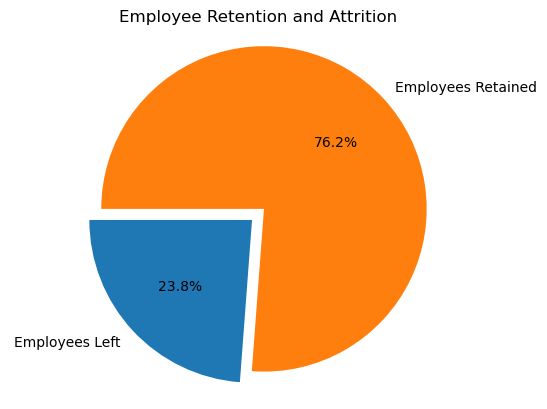

In [7]:
plt.pie([left.shape[0],(df.shape[0]-left.shape[0])], explode=(0.1,0), labels=["Employees Left","Employees Retained"],
        autopct='%1.1f%%', startangle=180)
plt.axis('equal')  

plt.title('Employee Retention and Attrition')
plt.show()

In [8]:
numeric_cols = df.select_dtypes(include='number').columns
df_numeric = df[numeric_cols]
df_numeric.loc[:,'left'] = df['left']
grouped_mean = df_numeric.groupby('left').mean()
grouped_mean

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


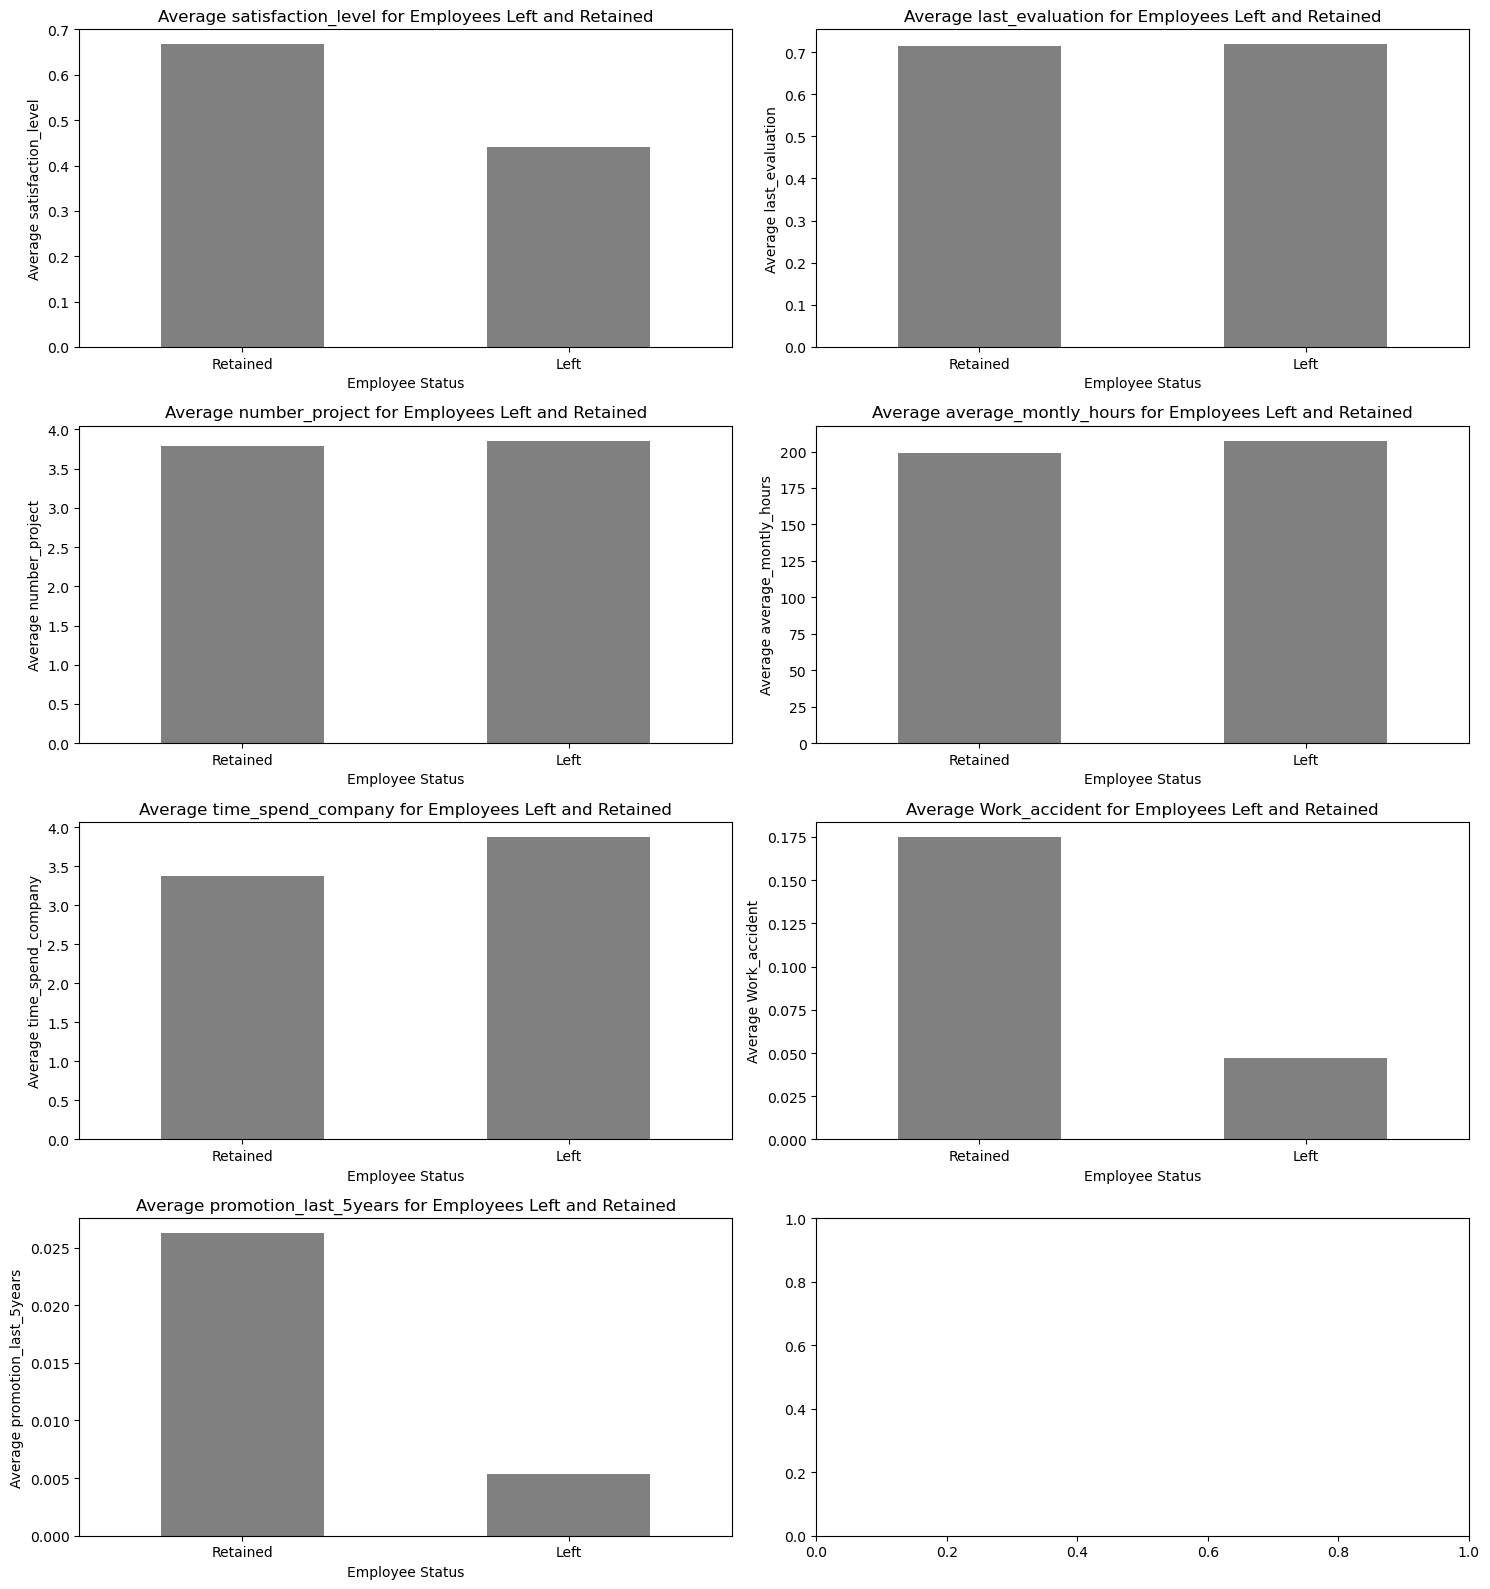

In [9]:
num_features = len(grouped_mean.columns)
num_cols = 2  
num_rows = (num_features + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

for i, column in enumerate(grouped_mean.columns):
    ax = axes[i // num_cols, i % num_cols]
    grouped_mean[[column]].plot(kind='bar', ax=ax, color='grey', legend=False)
    ax.set_title(f'Average {column} for Employees Left and Retained')
    ax.set_xlabel('Employee Status')
    ax.set_ylabel(f'Average {column}')
    ax.set_xticklabels(['Retained', 'Left'], rotation=0)

plt.tight_layout()
plt.show()

In [10]:
departments = df.Department.unique()
departments

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
for dep in departments:
    print(dep)

sales
accounting
hr
technical
support
management
IT
product_mng
marketing
RandD


In [12]:
total_employees_per_dept = df['Department'].value_counts()

left_per_dept = df[df['left'] == 1]['Department'].value_counts()

left_percentage_per_dept = (left_per_dept / total_employees_per_dept) * 100

print(left_percentage_per_dept)

Department
IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: count, dtype: float64


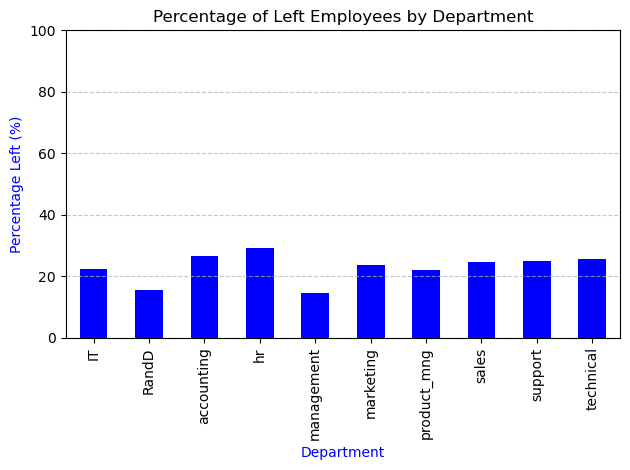

In [13]:
left_percentage_per_dept.plot(kind='bar', rot=0, color='blue')
plt.title('Percentage of Left Employees by Department')
plt.xlabel('Department',color="blue")
plt.xticks(rotation=90)
plt.ylabel('Percentage Left (%)',color="blue")
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Impact of department on Employee Retention

<Axes: xlabel='Department'>

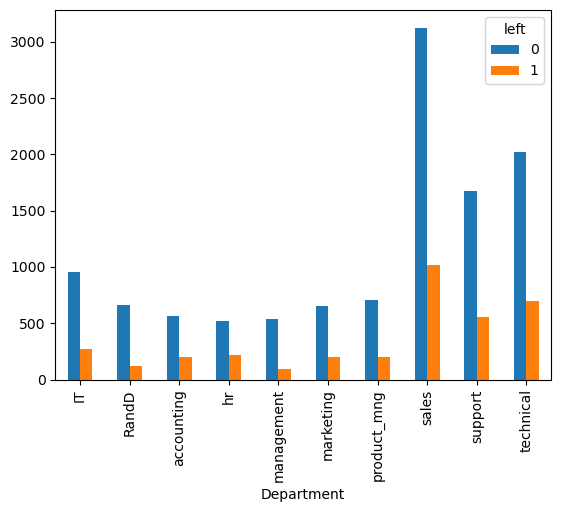

In [14]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above both charts there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

Salary Levels

In [15]:
salary_levels = df.salary.unique()
salary_levels

array(['low', 'medium', 'high'], dtype=object)

In [16]:
total_employees_per_salary_lvl = df['salary'].value_counts()

left_per_salary_lvl = df[df['left'] == 1]['salary'].value_counts()

left_percent_per_salary_lvl = (left_per_salary_lvl / total_employees_per_salary_lvl) * 100

print(left_percent_per_salary_lvl)

salary
low       29.688354
medium    20.431275
high       6.628941
Name: count, dtype: float64


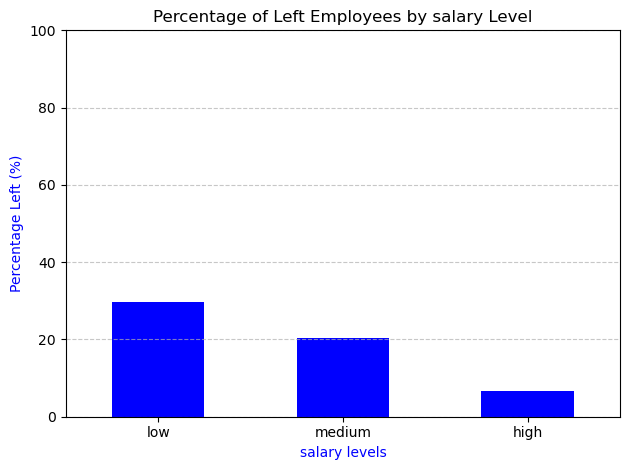

In [17]:
left_percent_per_salary_lvl.plot(kind='bar', rot=0, color='blue')
plt.title('Percentage of Left Employees by salary Level')
plt.xlabel('salary levels',color="blue")
plt.ylabel('Percentage Left (%)',color="blue")
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Impact of salary on Employee Retention

<Axes: xlabel='salary'>

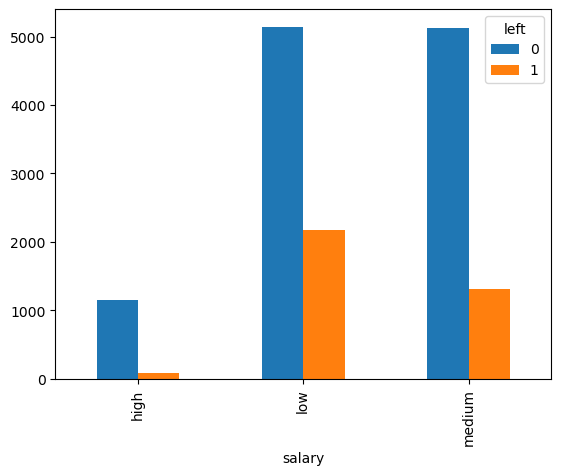

In [18]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

Both of above bar charts show employees with high salaries are likely to not leave the company

### Conclusions

1. <b>Satisfaction Level</b>: Satisfaction level is relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</br>
2. <b>Average Monthly Hours</b>: Average monthly hours are slightly higher in employees leaving the firm (199 vs 207)</br>
3. <b>Promotion Last 5 Years</b> : Employees who are given promotion in last 5 years are likely to be retained at firm</br>
4. <b>Salary level</b> : Employees who have low salary level are mostly who left the firm. When the salary level increase then the left precentage decreases.</br>

So we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [19]:
new_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


We use `dummy variables` to convert the text data in the `salary` to numeric values

In [20]:
salary_dummies= pd.get_dummies(new_df.salary,prefix="salary",dtype="int")
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [21]:
final_df_with_dummies = pd.concat([new_df,salary_dummies],axis='columns')
final_df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [22]:
final_df = final_df_with_dummies.drop(columns='salary')
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [23]:
X = final_df
y = df['left']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=10)

In [43]:
print("Number of data that is used to train : ",len(X_train))
print("Number of data that is used to test : ",len(X_test))

Number of data that is used to train :  7499
Number of data that is used to test :  7500


In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
predicted_values = model.predict(X_test)
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
model.score(X_test,y_test)

0.7766666666666666